# Compute the Stopping Distance for a Projectile
Compute the stopping distance of a projectile using the multi-velocity machine learning model.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import scienceplots
import os
import sys
sys.path.append(f"{os.getcwd()}/../../")
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
# from stopping_power_ml.stop_distance import StoppingDistanceComputer
# from stopping_power_ml.integrator import TrajectoryIntegrator
import pickle as pkl
import pandas as pd
import numpy as np
# import keras
import os
from glob import glob
import h5py

plt.style.use(['science', 'notebook'])

## Load in the Model and Featurizer
The model is saved in Keras h5, and the featurizer is in the root directory

In [2]:
with open(os.path.join('..', 'featurizer.pkl'), 'rb') as fp:
    featurizers = pkl.load(fp)

start_frame = pkl.load(open(os.path.join('..', '..', 'al_starting_frame.pkl'), 'rb'))

channel_data = pd.read_pickle(os.path.join('..', '..', 'single-velocity', 'data', 'channel_data.pkl.gz')).query('average_range')

min_velocity = pd.read_pickle(os.path.join('..', '..', 'training_data.pkl.gz'))['velocity_mag'].min()
max_velocity = pd.read_pickle(os.path.join('..', '..', 'training_data.pkl.gz'))['velocity_mag'].max()
print(min_velocity, max_velocity)

0.49999965530500606 4.000000001113168


In [3]:
file_all = glob('./all_force/*/force.h5')
dset_all = []
info_all = []
for hdf5_file in file_all:
    # print(hdf5_file)
    h5f = h5py.File(hdf5_file)
    for dset in h5f.keys():
        dset = h5f[dset]
        dset_all.append(dset)
        info = {key: dset.attrs[key] for key in dset.attrs}
        info_all.append(info)
        # print(info)

# print("DataFrames and their attributes have been read from the HDF5 file.")
# print(dset)

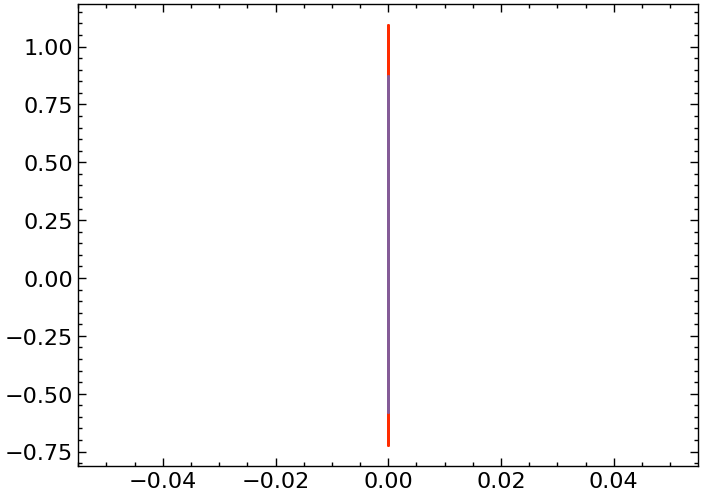

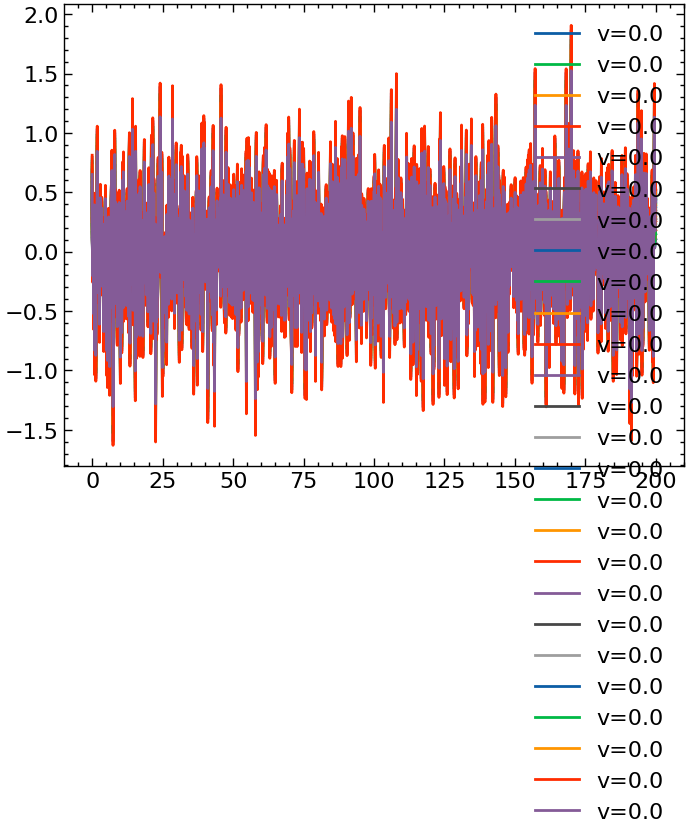

In [4]:
def sel_func(info):
    sel_pos = np.allclose(info['start_pos'], np.array([0.0, 0.75, 0.75])) == True
    return sel_pos

for i in range(len(file_all)):
    info = info_all[i]
    if (sel_func(info)):
        # print(info)
        dset = dset_all[i]
        # print(dset[0], dset[1])
        plt.figure("fixed x")
        plt.plot(dset[0, :, 1], dset[0, :, 2], label = f"x={dset[0, 0, 0]}")
        plt.figure("fixed v")
        plt.plot(dset[:, 0, 0], dset[:, 0, 2], label = f"v={dset[0, 0, 0]}")
        
plt.legend()

## Displacement v. force for multiple velocities

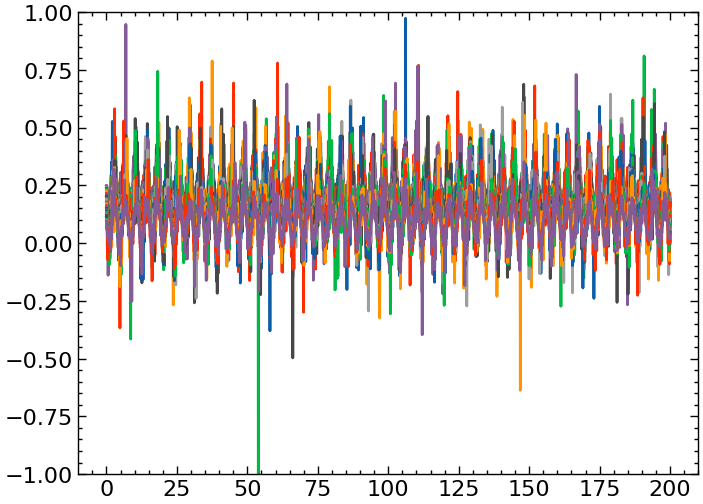

In [5]:
plt.figure("fixed v")
plt.ylim(-1, 1)
for i in range(len(dset[0])):
    plt.plot(dset[:, i, 0], dset[:, i, -1], label = f"v={dset[0, i, -2]}")

In [6]:
print(start_frame.cell[0, 0])
# for displacement in range(len(dset)):
print(dset_all)

30.6238
[<HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5 dataset "states": shape (2000, 40, 6), type "<f8">, <HDF5

Text(0, 0.5, 'stopping power')

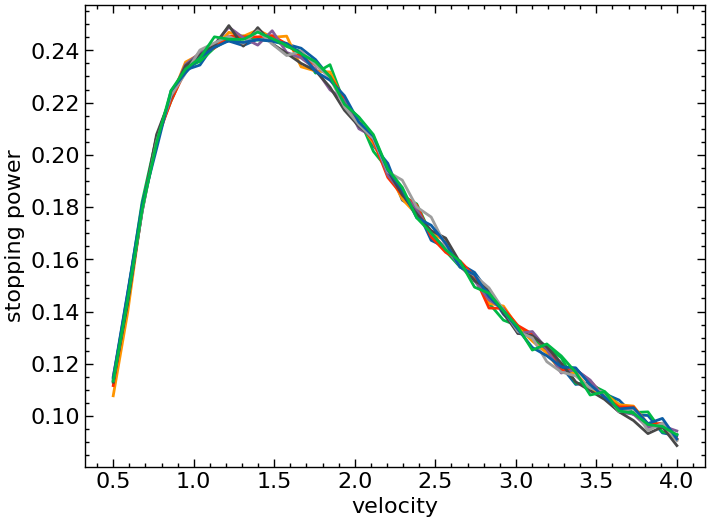

In [7]:
# fig, axs = plt.subplots(len(dset_all))
# fig.tight_layout()
# fig.suptitle("Stopping power with change in covariance")

lattice_constant = start_frame.cell[0, 0]

# for i in range(len(dset_all)):
#     dset = dset_all[i]
#     for variance in range(0, 170, 20):
#         stopping_force = []
#         for velocity in range(len(dset[0])):
#             displacement = dset[:, velocity, 0]
#             force = dset[:, velocity, -1]
#             sel = np.where((displacement > variance)&(displacement < variance + lattice_constant))
#             stopping_force.append(np.mean(force[sel]))
#         axs[i].plot(dset[0, :, -2], stopping_force)
# plt.show()
dset = dset_all[25]
for variance in range(0, 170, 20):
    stopping_force = []
    for velocity in range(len(dset[0])):
        displacement = dset[:, velocity, 0]
        force = dset[:, velocity, -1]
        sel = np.where((displacement > variance)&(displacement < variance + lattice_constant))
        stopping_force.append(np.mean(force[sel]))
    plt.plot(dset[0, :, -2], stopping_force)

plt.xlabel("velocity")
plt.ylabel("stopping power")

Text(0, 0.5, 'std of stopping power')

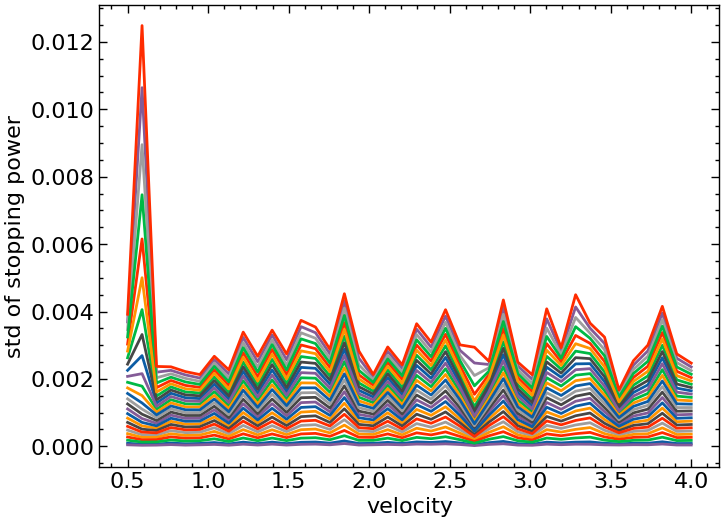

In [8]:
lattice_constant = start_frame.cell[0, 0]
for dset_num in range(len(dset_all)):
    dset = dset_all[dset_num]
    stopping_force_var = []
    for variance in range(0, 170, 20):
        stopping_force = []
        for velocity in range(len(dset[0])):
            displacement = dset[:, velocity, 0]
            force = dset[:, velocity, -1]
            sel = np.where((displacement > variance)&(displacement < variance + lattice_constant))
            stopping_force.append(np.mean(force[sel]))
        stopping_force_var.append(stopping_force)
    
    stopping_power_std = []
    for velocity in range(len(stopping_force_var[0])):
        force_at_v = []
        for i in range(len(stopping_force_var)):
            force_at_v.append(stopping_force_var[i][velocity])
        stopping_power_std.append(np.std(force_at_v))
    
    plt.plot(dset[0, :, -2], stopping_power_std, label = f"cov={info_all[dset_num]['covariance']}")

plt.xlabel("velocity")
plt.ylabel("std of stopping power")
# plt.legend()

Text(0, 0.5, 'stopping power')

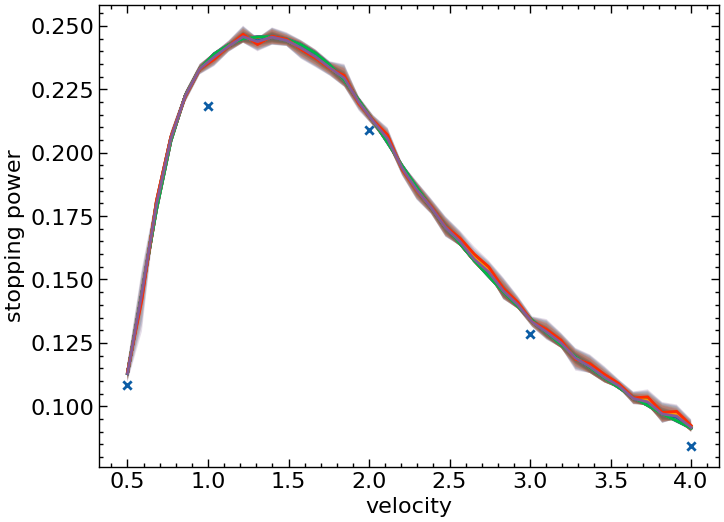

In [9]:
lattice_constant = start_frame.cell[0, 0]

dat = np.loadtxt("../stopping_power-100.csv", delimiter = ',', skiprows = 1)
plt.scatter(dat[:,0], dat[:, 1], marker = 'x')

for dset_num in range(len(dset_all)):
    dset = dset_all[dset_num]
    stopping_force_var = []
    for variance in range(0, 170, 20):
        stopping_force = []
        for velocity in range(len(dset[0])):
            displacement = dset[:, velocity, 0]
            force = dset[:, velocity, -1]
            sel = np.where((displacement > variance)&(displacement < variance + lattice_constant))
            stopping_force.append(np.mean(force[sel]))
        stopping_force_var.append(stopping_force)

    stopping_power_mean = np.mean(stopping_force_var, axis = 0)
    stopping_power_std = np.std(stopping_force_var, axis = 0)
    
    plt.plot(dset[0, :, -2], stopping_power_mean, label = f"std={info_all[dset_num]['covariance'][0, 0]}")
    plt.fill_between(dset[0, :, -2], stopping_power_mean - stopping_power_std, stopping_power_mean + stopping_power_std, alpha=0.2)

plt.xlabel("velocity")
plt.ylabel("stopping power")
# plt.legend()

/tmp/ipykernel_14844/1799488505.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')  # You can choose any other sequential colormap
/tmp/ipykernel_14844/1799488505.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


Text(0, 0.5, 'std of stopping power (at. u.)')

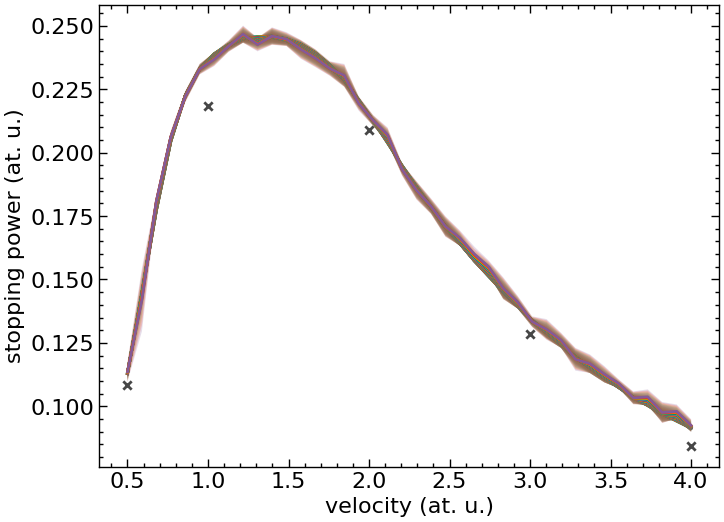

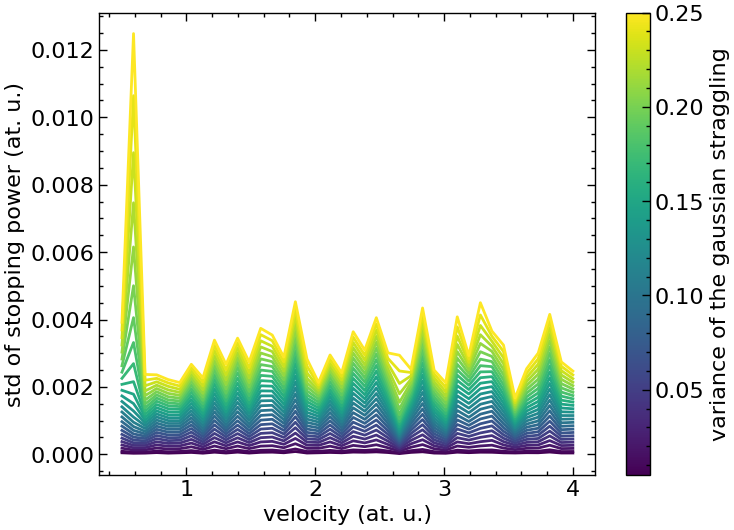

In [10]:
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib.colors import Normalize

lattice_constant = start_frame.cell[0, 0]

cov_all = []

for dset_num in range(len(dset_all)):
    cov_all.append(info_all[dset_num]['covariance'][0, 0])

sort = np.argsort(cov_all)

cmap = get_cmap('viridis')  # You can choose any other sequential colormap

norm = Normalize(vmin = np.min(cov_all), vmax = np.max(cov_all))

for dset_num in sort:
    dset = dset_all[dset_num]
    stopping_force_var = []
    for variance in range(0, 170, 20):
        stopping_force = []
        for velocity in range(len(dset[0])):
            displacement = dset[:, velocity, 0]
            force = dset[:, velocity, -1]
            sel = np.where((displacement > variance)&(displacement < variance + lattice_constant))
            stopping_force.append(np.mean(force[sel]))
        stopping_force_var.append(stopping_force)

    stopping_power_mean = np.mean(stopping_force_var, axis = 0)
    stopping_power_std = np.std(stopping_force_var, axis = 0) 

    plt.figure("mean and std")
    plt.plot(dset[0, :, -2], stopping_power_mean)
    plt.fill_between(dset[0, :, -2], stopping_power_mean - stopping_power_std, stopping_power_mean + stopping_power_std, alpha=0.2)

    plt.figure("std")
    plt.plot(dset[0, :, -2], stopping_power_std, c = cmap(norm(cov_all[dset_num])))

plt.figure("mean and std")
plt.xlabel("velocity (at. u.)")
plt.ylabel("stopping power (at. u.)")
dat = np.loadtxt("../stopping_power-100.csv", delimiter = ',', skiprows = 1)
plt.scatter(dat[:,0], dat[:, 1], marker = 'x')

plt.figure("std")
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('variance of the gaussian straggling')

plt.xlabel("velocity (at. u.)")
plt.ylabel("std of stopping power (at. u.)")